# 3: Regresión logística con SKLEARN:

In [3]:
#Imports:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [4]:
uploaded = files.upload()

Saving league_of_legends_data_large.csv to league_of_legends_data_large.csv


In [5]:
#Cargar el dataset:
df = pd.read_csv('league_of_legends_data_large.csv')


In [6]:
#Seleccionar la variable target:
X = df.drop(columns=['win'])
y = df['win']

In [7]:
#Dividir el dataset en conjuntos X e Y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#Estandarizado de los datos.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#Definir y entrenar el modelo.
model = LogisticRegression(class_weight='balanced', max_iter=2500)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2500)

In [10]:
#Predecir probabilidades y etiquetas.
y_pred = model.predict(X_test_scaled)

In [11]:
#Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

In [12]:
#Visualizar la matriz por consola.
print("Matriz de Confusión:")
print(cm)
print(f"TP (Verdaderos Ganadores):\t{cm[1, 1]}")
print(f"FN (Falsos Perdedores):\t\t{cm[1, 0]}")
print(f"FP (Falsos Ganadores):\t\t{cm[0, 1]}")
print(f"TN (Verdaderos Perdedores):\t{cm[0, 0]}")

Matriz de Confusión:
[[46 49]
 [48 57]]
TP (Verdaderos Ganadores):	57
FN (Falsos Perdedores):		48
FP (Falsos Ganadores):		49
TN (Verdaderos Perdedores):	46


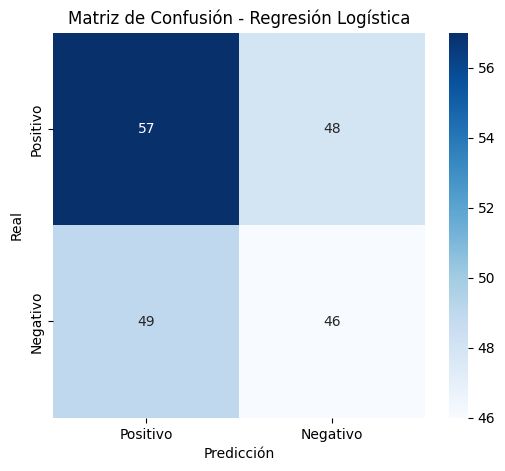

In [13]:
#Reorganizar la matriz y representarla visualmente
cm_visual = [[cm[1, 1], cm[1, 0]],
             [cm[0, 1], cm[0, 0]]]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_visual, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

In [14]:
#Reporte de clasificación:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49        95
           1       0.54      0.54      0.54       105

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200



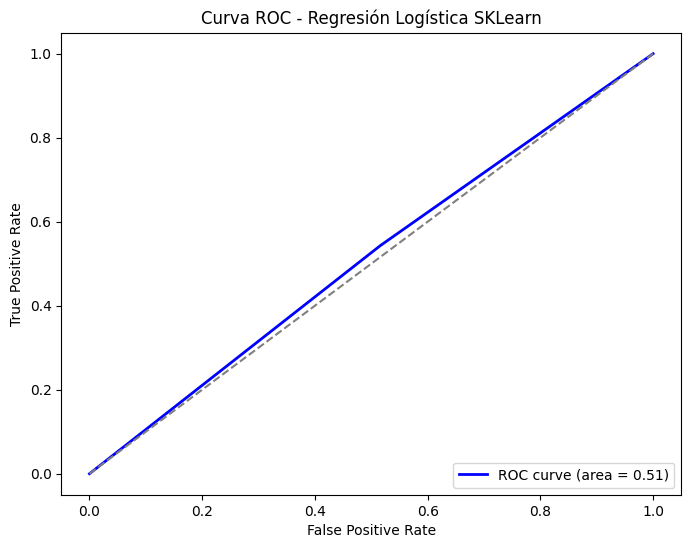

In [15]:
#Definir y representar curva ROC

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística SKLearn')
plt.legend(loc='lower right')
plt.show()